# Training Data Evaluation


How much data is needed?
* Learning curve

What kind of data is needed?
* regression model (more complicated with multi-class)
* t-Distributed Stochastic Neighbor Embedding (t-SNE)
* Confusion matrix w/ multiple training data versions

How to obtain/label more data?
* label propagation 
* polygons shared by government partners

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import numpy as np
sys.path.append('../src/')
import features.create_xy as p
import hickle as hkl
import rasterio as rs
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import pickle
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Review Label Arrays

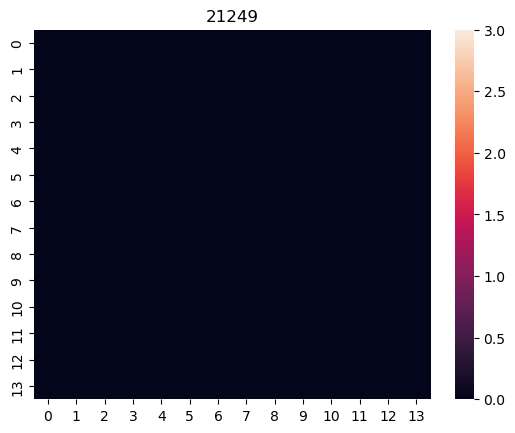

In [19]:
idx = 21249
label = np.load("../data/train-labels/" + str(idx) + ".npy")
sns.heatmap(label, vmin=0, vmax=3).set_title(str(idx));

# How much training data is needed?

## Learning Curve

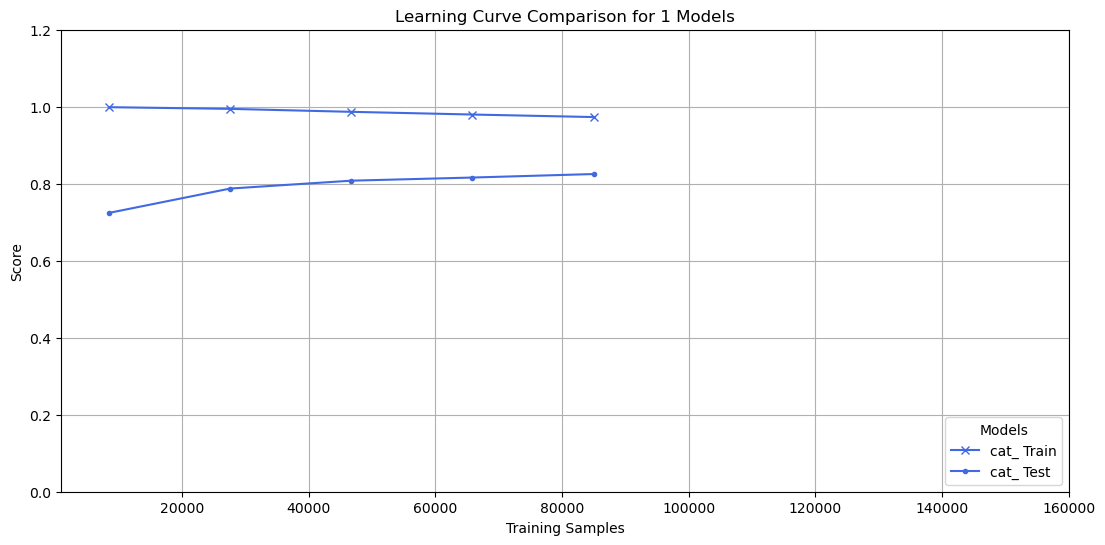

In [164]:
v20_feats = [0, 1, 5, 6, 8, 9, 11, 14, 16, 19, 20, 21, 28, 31, 33, 34, 36, 37, 39, 44, 45, 47, 48, 49, 50, 51, 52, 57, 58, 60, 61, 62, 63, 64, 72, 76, 77, 78, 79, 80]
X, y = pp.create_xy(['v08','v14', 'v15', 'v18', 'v19', 'v20'], 
                    classes='multi',
                    drop_feats=False, 
                    feature_select=v20_feats,
                    verbose=False)
X_train_ss, X_test_ss, y_train, y_test = pp.reshape_no_scaling(X, y)
viz.learning_curve_comp(['cat_v20_tuned'], X_train_ss, y_train, 160000)

# What kind of training data is needed?

## Confusion Matrices

In [6]:
# check out results
v20_feats = [0, 1, 5, 6, 8, 9, 11, 14, 16, 19, 20, 21, 28, 31, 33, 34, 36, 37, 39, 44, 45, 47, 48, 49, 50, 51, 52, 57, 58, 60, 61, 62, 63, 64, 72, 76, 77, 78, 79, 80]
X, y = pp.create_xy(['v08','v14', 'v15', 'v18', 'v19', 'v20'], 
                    classes='multi',
                    drop_feats=False, 
                    feature_select=v20_feats,
                    verbose=False)
X_train_v20, X_test_v20, y_train_v20, y_test_v20 = pp.reshape_no_scaling(X, y)
y_test, pred, probs, probs_pos = rp.fit_eval_multiclassifier(X_train_v20, 
                                                             X_test_v20, 
                                                             y_train_v20, 
                                                             y_test_v20, 
                                                             'cat',
                                                             'v20_tuned')

In [9]:
v19_ss_feats = [0, 1, 5, 6, 9, 11, 14, 16, 19, 20, 21, 28, 29, 31, 32, 34, 36, 38, 39, 43, 44, 47, 50, 51, 52, 57, 58, 59, 60, 61, 63, 64, 69, 70, 71, 72, 76, 77, 78, 80]
X, y = pp.create_xy(['v08','v14', 'v15', 'v18', 'v19'], 
                    classes='multi',
                    drop_feats=False, 
                    feature_select=v19_ss_feats,
                    verbose=False)
X_train_v19, X_test_v19, y_train_v19, y_test_v19 = pp.reshape_no_scaling(X, y)
y_test_v19, pred_v19, probs_v19, probs_pos_v19 = rp.fit_eval_multiclassifier(X_train_v19, 
                                                             X_test_v19, 
                                                             y_train_v19, 
                                                             y_test_v19, 
                                                             'cat',
                                                             'v19_tuned')

164 plots labeled "unknown" were dropped: [8015, 8019, 8023, 8035, 8044, 8049, 8066, 8081, 8085, 8092, 8097, 8103, 8104, 8115, 8116, 8127, 8136, 8140, 8144, 8148, 8157, 8161, 8162, 8163, 8166, 8167, 8172, 8178, 8180, 8184, 8185, 8196, 8200, 8201, 8205, 8207, 8209, 14004, 14015, 14018, 14029, 14030, 14044, 14046, 14063, 14066, 14076, 14077, 14087, 14092, 14113, 14118, 14119, 14120, 14127, 14129, 14133, 14134, 14135, 14139, 14141, 14144, 14149, 14151, 14152, 14153, 14154, 14155, 14158, 14159, 14163, 14170, 14171, 14172, 14177, 14186, 14187, 14189, 14191, 14207, 14210, 14212, 14214, 14220, 14222, 14224, 14230, 14232, 14235, 14238, 15010, 15046, 18058, 18080, 18082, 18101, 18104, 18105, 18106, 18107, 18108, 18111, 18114, 18115, 18116, 18118, 18122, 18125, 18126, 18127, 18129, 18130, 18139, 18141, 18142, 18144, 18151, 18153, 18162, 18164, 18171, 18177, 18178, 18179, 18180, 18182, 18183, 18184, 18186, 18188, 18189, 18190, 18191, 18192, 18193, 18194, 18195, 18196, 18197, 18198, 18200, 19085, 

100%|███████████████████████████████████████████████████████████████████████████████| 695/695 [05:41<00:00,  2.03it/s]


Class count {0.0: 56292, 1.0: 17187, 2.0: 62741}


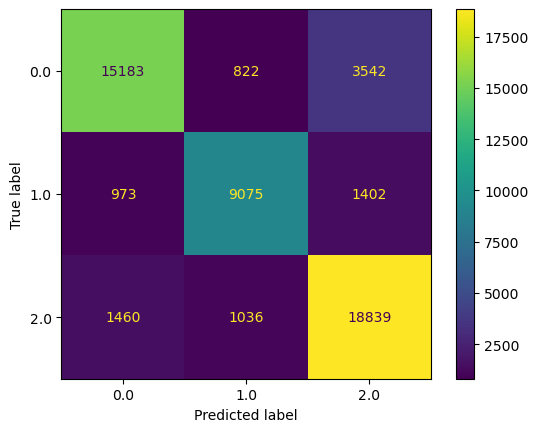

In [34]:
with open(f'../models/cat_v20_tuned.pkl', 'rb') as file:  
    model = pickle.load(file)

# Confusion Matrix
cm_v20 = confusion_matrix(y_test_v20, pred, labels=model.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm_v20, display_labels=model.classes_).plot();

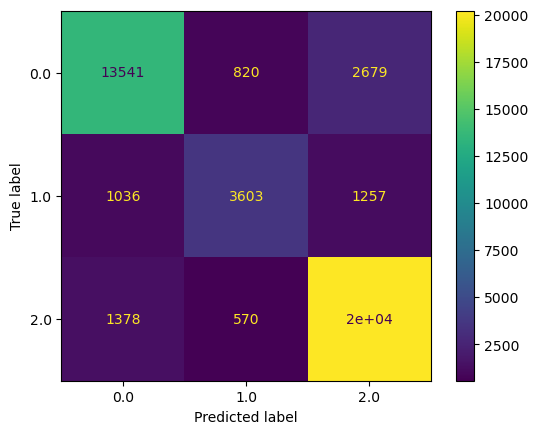

In [35]:
with open(f'../models/cat_v19_tuned.pkl', 'rb') as file:  
    model = pickle.load(file)

# Confusion Matrix
cm_v19 = confusion_matrix(y_test_v19, pred_v19, labels=model.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm_v19, display_labels=model.classes_).plot();

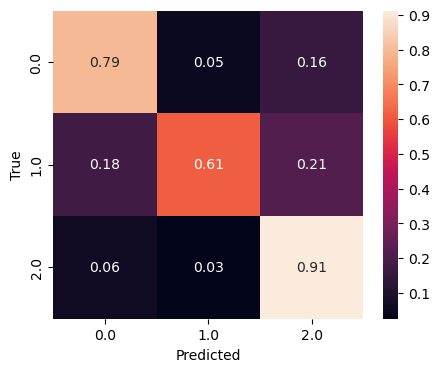

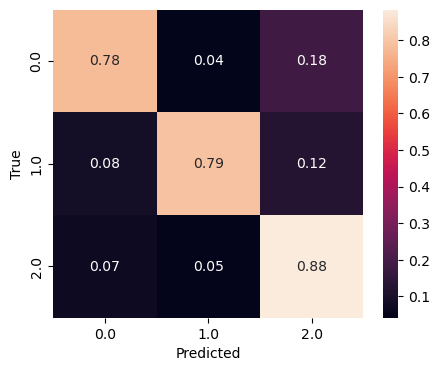

In [41]:
# Normalise and compare
cmn_v19 = cm_v19.astype('float') / cm_v19.sum(axis=1)[:, np.newaxis]
cmn_v20 = cm_v20.astype('float') / cm_v20.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(5,4))
sns.heatmap(cmn_v19, annot=True, fmt='.2f', xticklabels=model.classes_, yticklabels=model.classes_)
plt.ylabel('True')
plt.xlabel('Predicted')
plt.show(block=False)

plt.figure(figsize=(5,4))
sns.heatmap(cmn_v20, annot=True, fmt='.2f', xticklabels=model.classes_, yticklabels=model.classes_)
plt.ylabel('True')
plt.xlabel('Predicted')
plt.show(block=False)

The difference between v19 and v20 was the addition of monoculture oil palm and rubber plantation to improve the class imbalance. The breakdown is now:  
*Non-plantation %35.68, Monoculture %24.74, Agroforestry %39.56*  
With the addition of this training data, the main changes occur in the middle row. The proportion of true positives increases and the proportion of false positives decreases. The highest amount of misclassification is happening in instances where non plantation trees are classified as agroforestry.


In [1]:
def visualize_plotpreds(model_name, plot):
    
    filename = f'../models/{model_name}.pkl'
    v20_feats = [0, 1, 5, 6, 8, 9, 11, 14, 16, 19, 20, 21, 28, 31, 33, 34, 36, 37, 39, 44, 45, 47, 48, 49, 50, 51, 52, 57, 58, 60, 61, 62, 63, 64, 72, 76, 77, 78, 79, 80]
    slope = pp.load_slope(plot)
    s1 = pp.load_s1(plot)
    s2 = pp.load_s2(plot)
    ttc = pp.load_ttc(plot)
    txt = pp.load_txt(plot)
    X = pp.make_sample((14, 14), slope, s1, s2, txt, ttc, v20_feats)
    y = pp.load_label(plot, classes='multi')

    with open(filename, 'rb') as file:
        model = pickle.load(file)
        
    X = np.reshape(X, (np.prod(X.shape[:-1]), X.shape[-1]))

    preds = model.predict(X)
     
    plt.figure(figsize=(17,6)) 

    plt.subplot(1,2,1)
    sns.heatmap(preds.reshape((14,14)), vmin=0, vmax=2).set_title(f'predicted: {model_name}')
    plt.subplot(1,2,2)
    sns.heatmap(y.reshape((14,14)), vmin=0, vmax=2).set_title('actual')
    
    return None

In [6]:
visualize_plotpreds('cat_v20_tuned', 20120)

# Histogram Comparisons

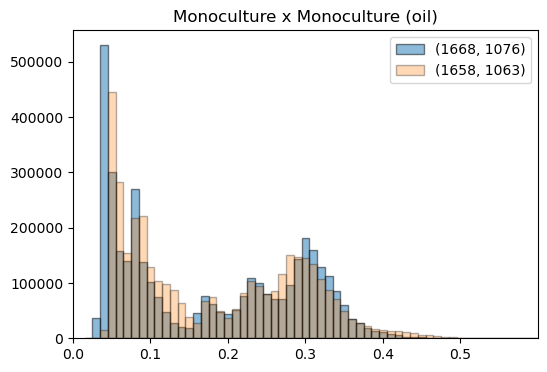

In [57]:
# abirem in blue, pd_southeast in orange
make.hist_compare_s2('ghana', (1668, 1076), (1658, 1063), 'Monoculture x Monoculture (oil)');

In [5]:
make.hist_compare_s2_byband('ghana', (1668, 1076), (1658, 1063), 'Monoculture x Monoculture');

In [4]:
make.hist_compare_s2('ghana', (1668, 1075), (1662, 1073), 'Natural x Natural');

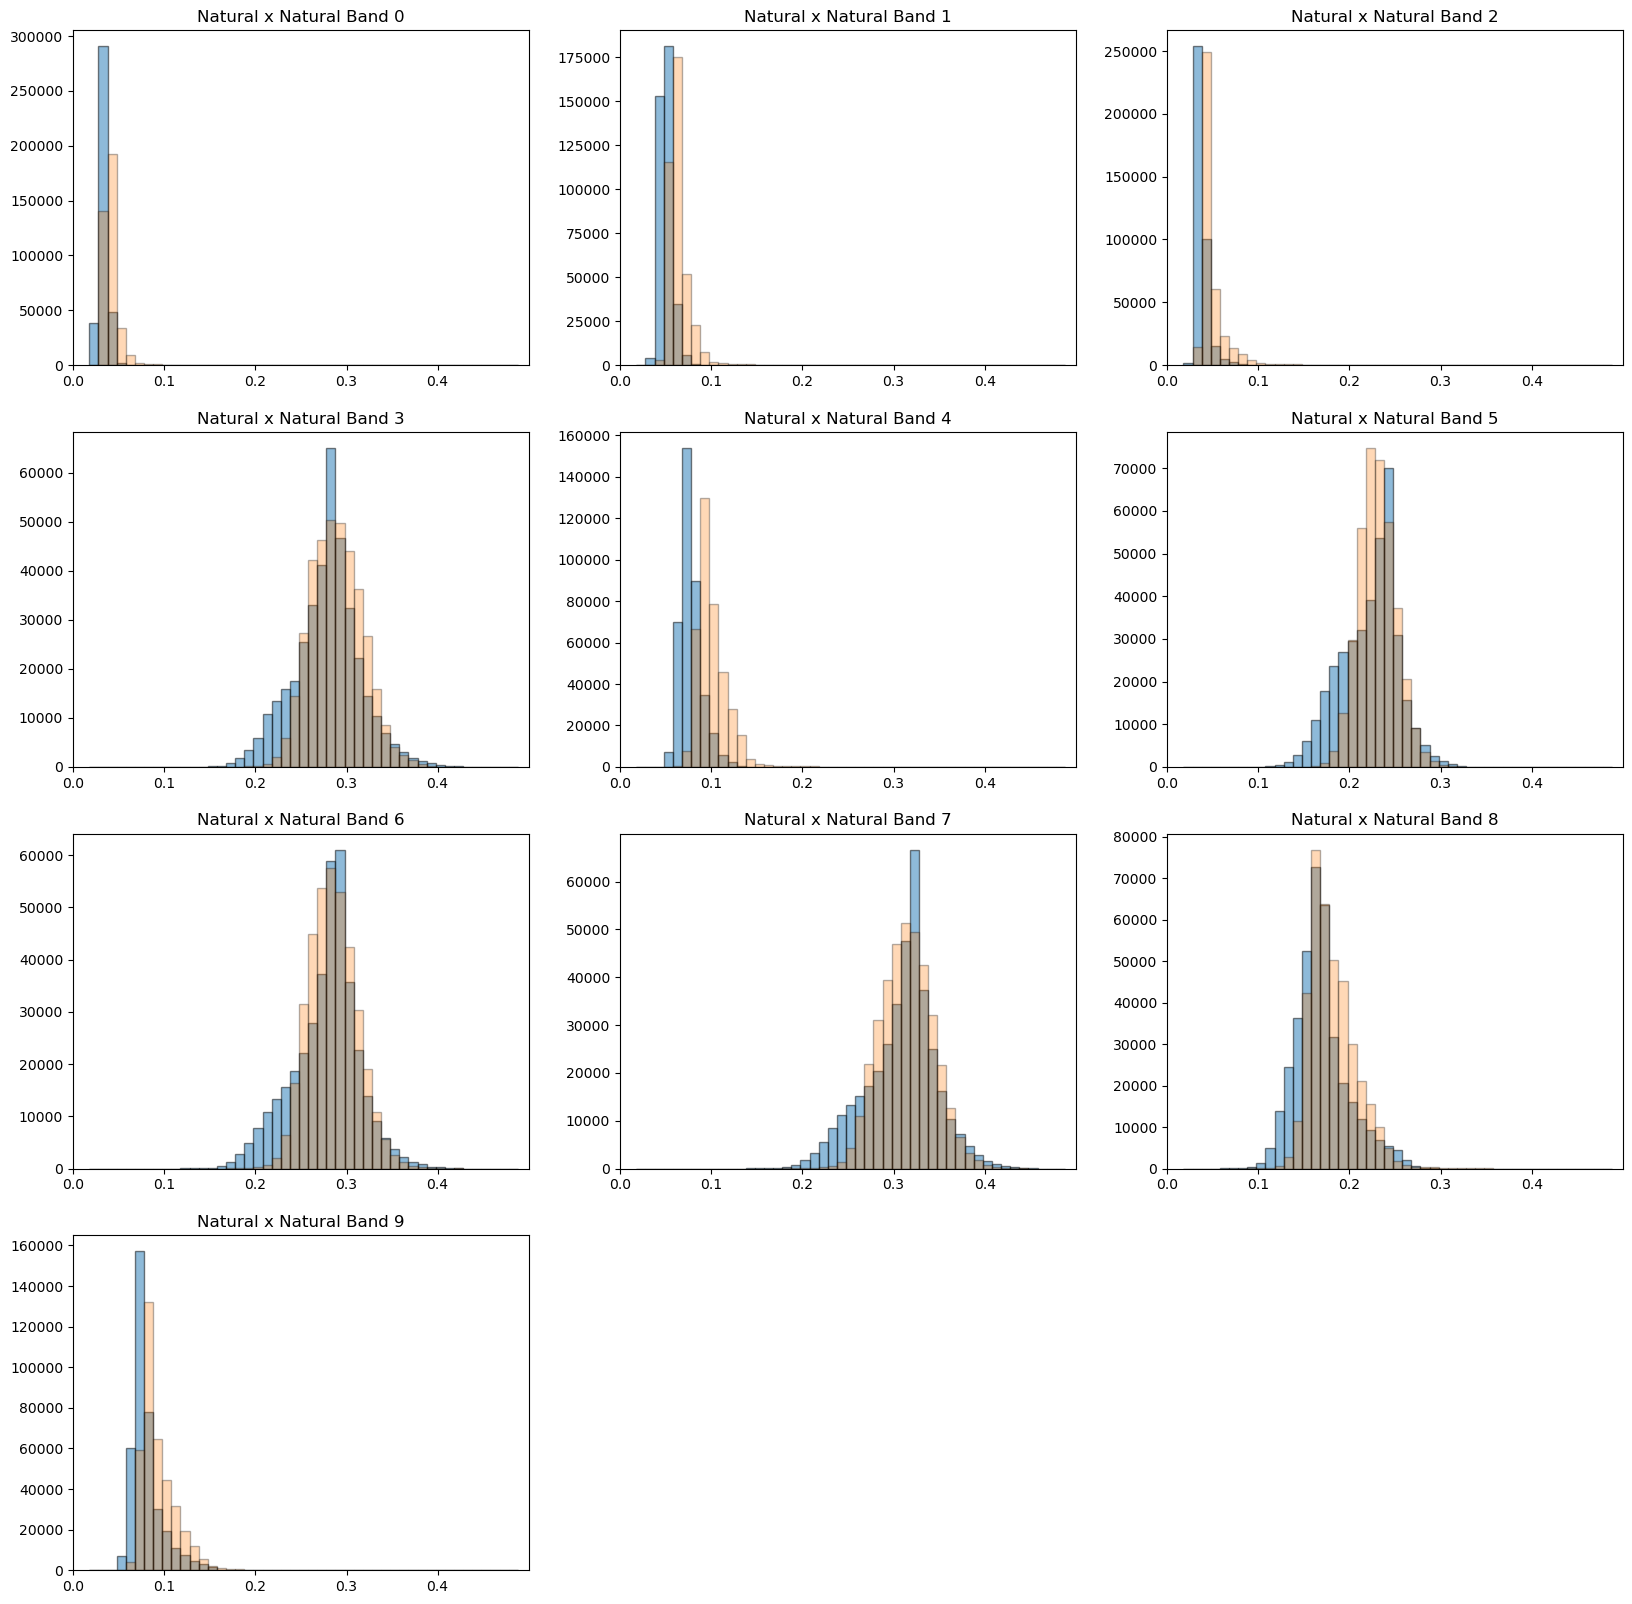

In [72]:
make.hist_compare_s2_byband('ghana', (1668, 1075), (1662, 1073), 'Natural x Natural');

In [3]:
make.hist_compare_s2('ghana', (1668, 1075), (1653, 1065), 'Natural x Natural');

In [2]:
make.hist_compare_s2('ghana', (1670, 1075), (1659, 1070), 'Agroforestry x Agroforestry');

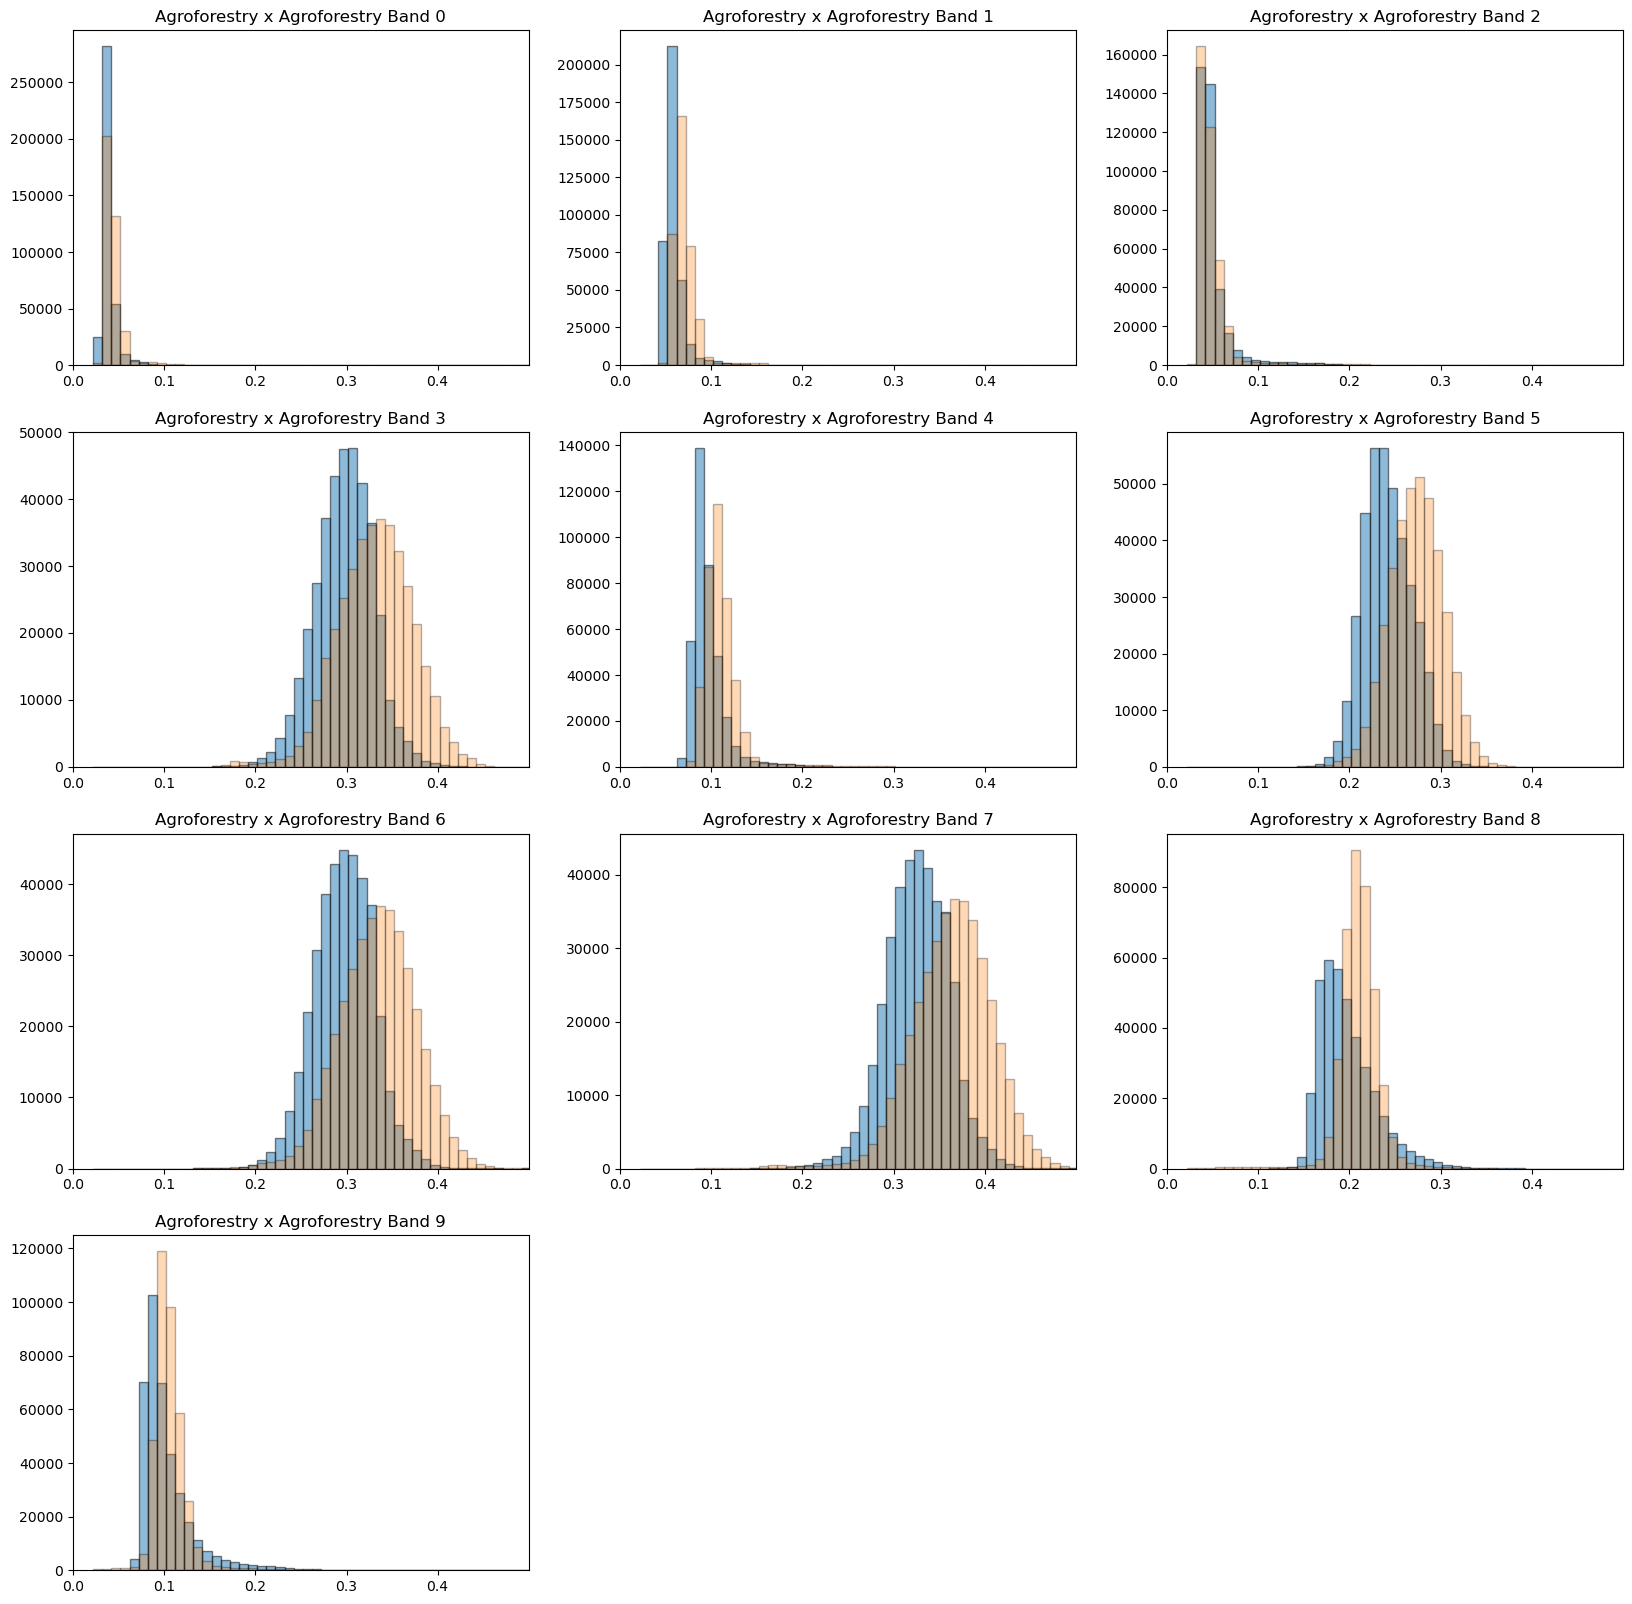

In [73]:
make.hist_compare_s2_byband('ghana', (1670, 1075), (1659, 1070), 'Agroforestry x Agroforestry');

In [1]:
# the tile for abirem is agroforestry w some smallholder oil palm
# the tile for pd_southeast is a natural forest misclassified as agroforestry
make.hist_compare_s2('ghana', (1668, 1075), (1661, 1074), 'Agroforestry x Predicted Agroforestry');

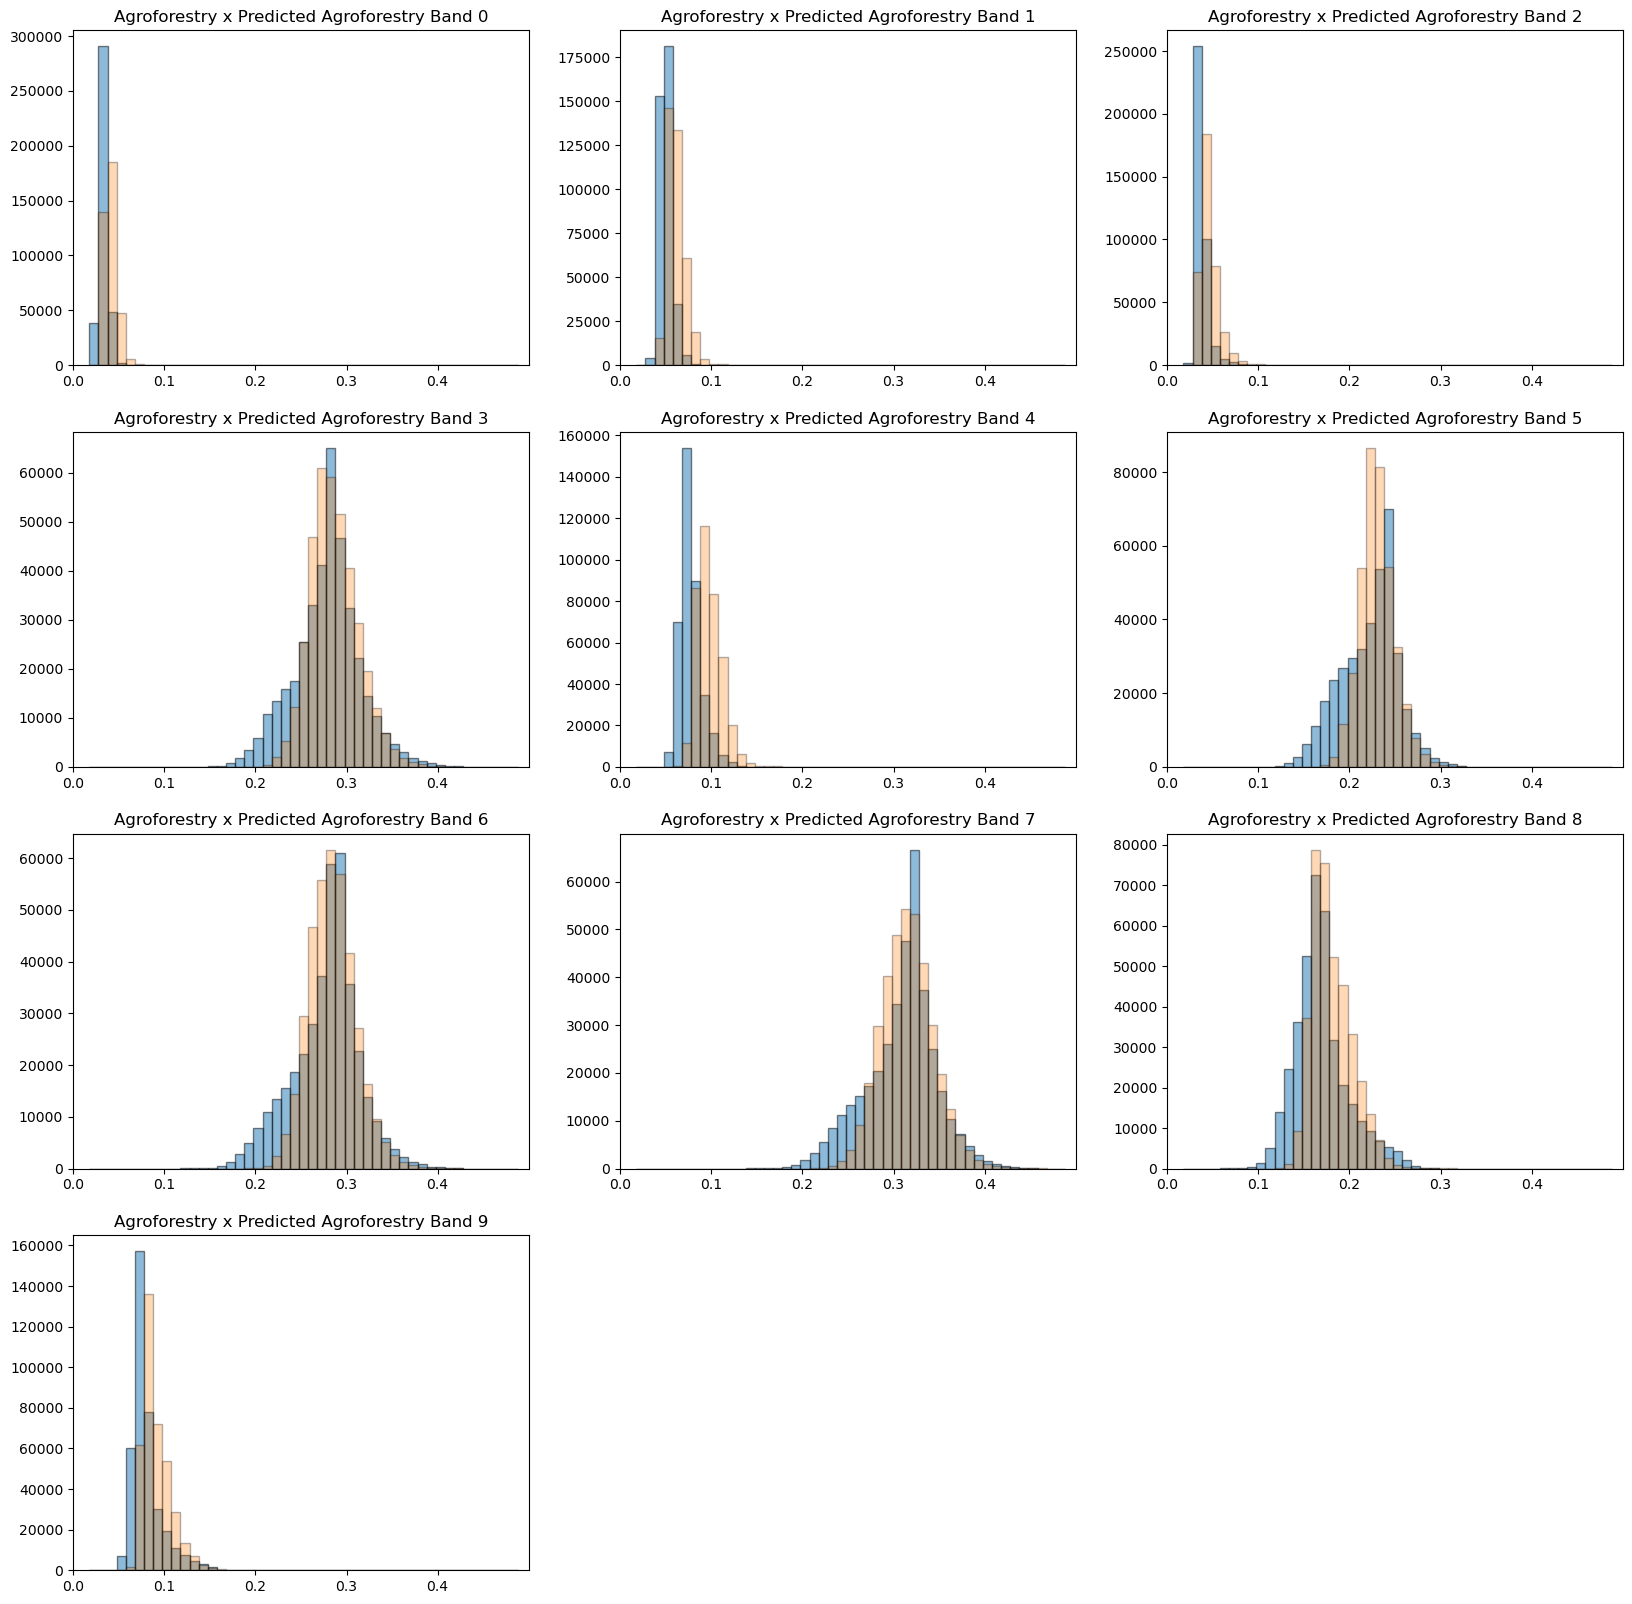

In [74]:
make.hist_compare_s2_byband('ghana', (1668, 1075), (1661, 1074), 'Agroforestry x Predicted Agroforestry');

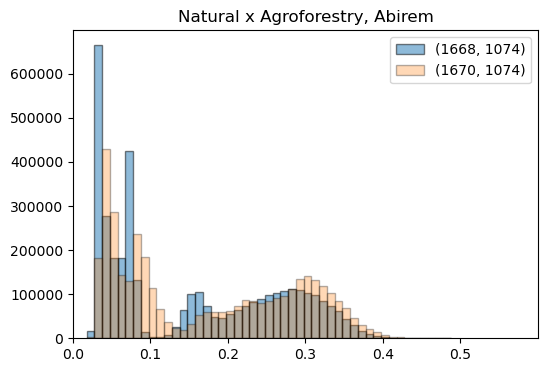

In [45]:
make.hist_compare_s2('ghana', (1668, 1074), (1670, 1074), 'Natural x Agroforestry, Abirem');

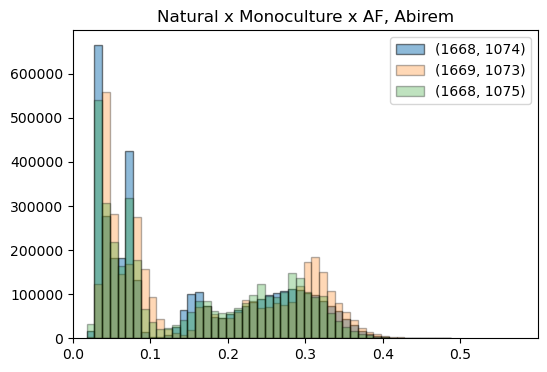

In [66]:
make.hist_compare_s2('ghana', (1668, 1074), (1669, 1073), 'Natural x Monoculture x AF, Abirem', (1668, 1075));

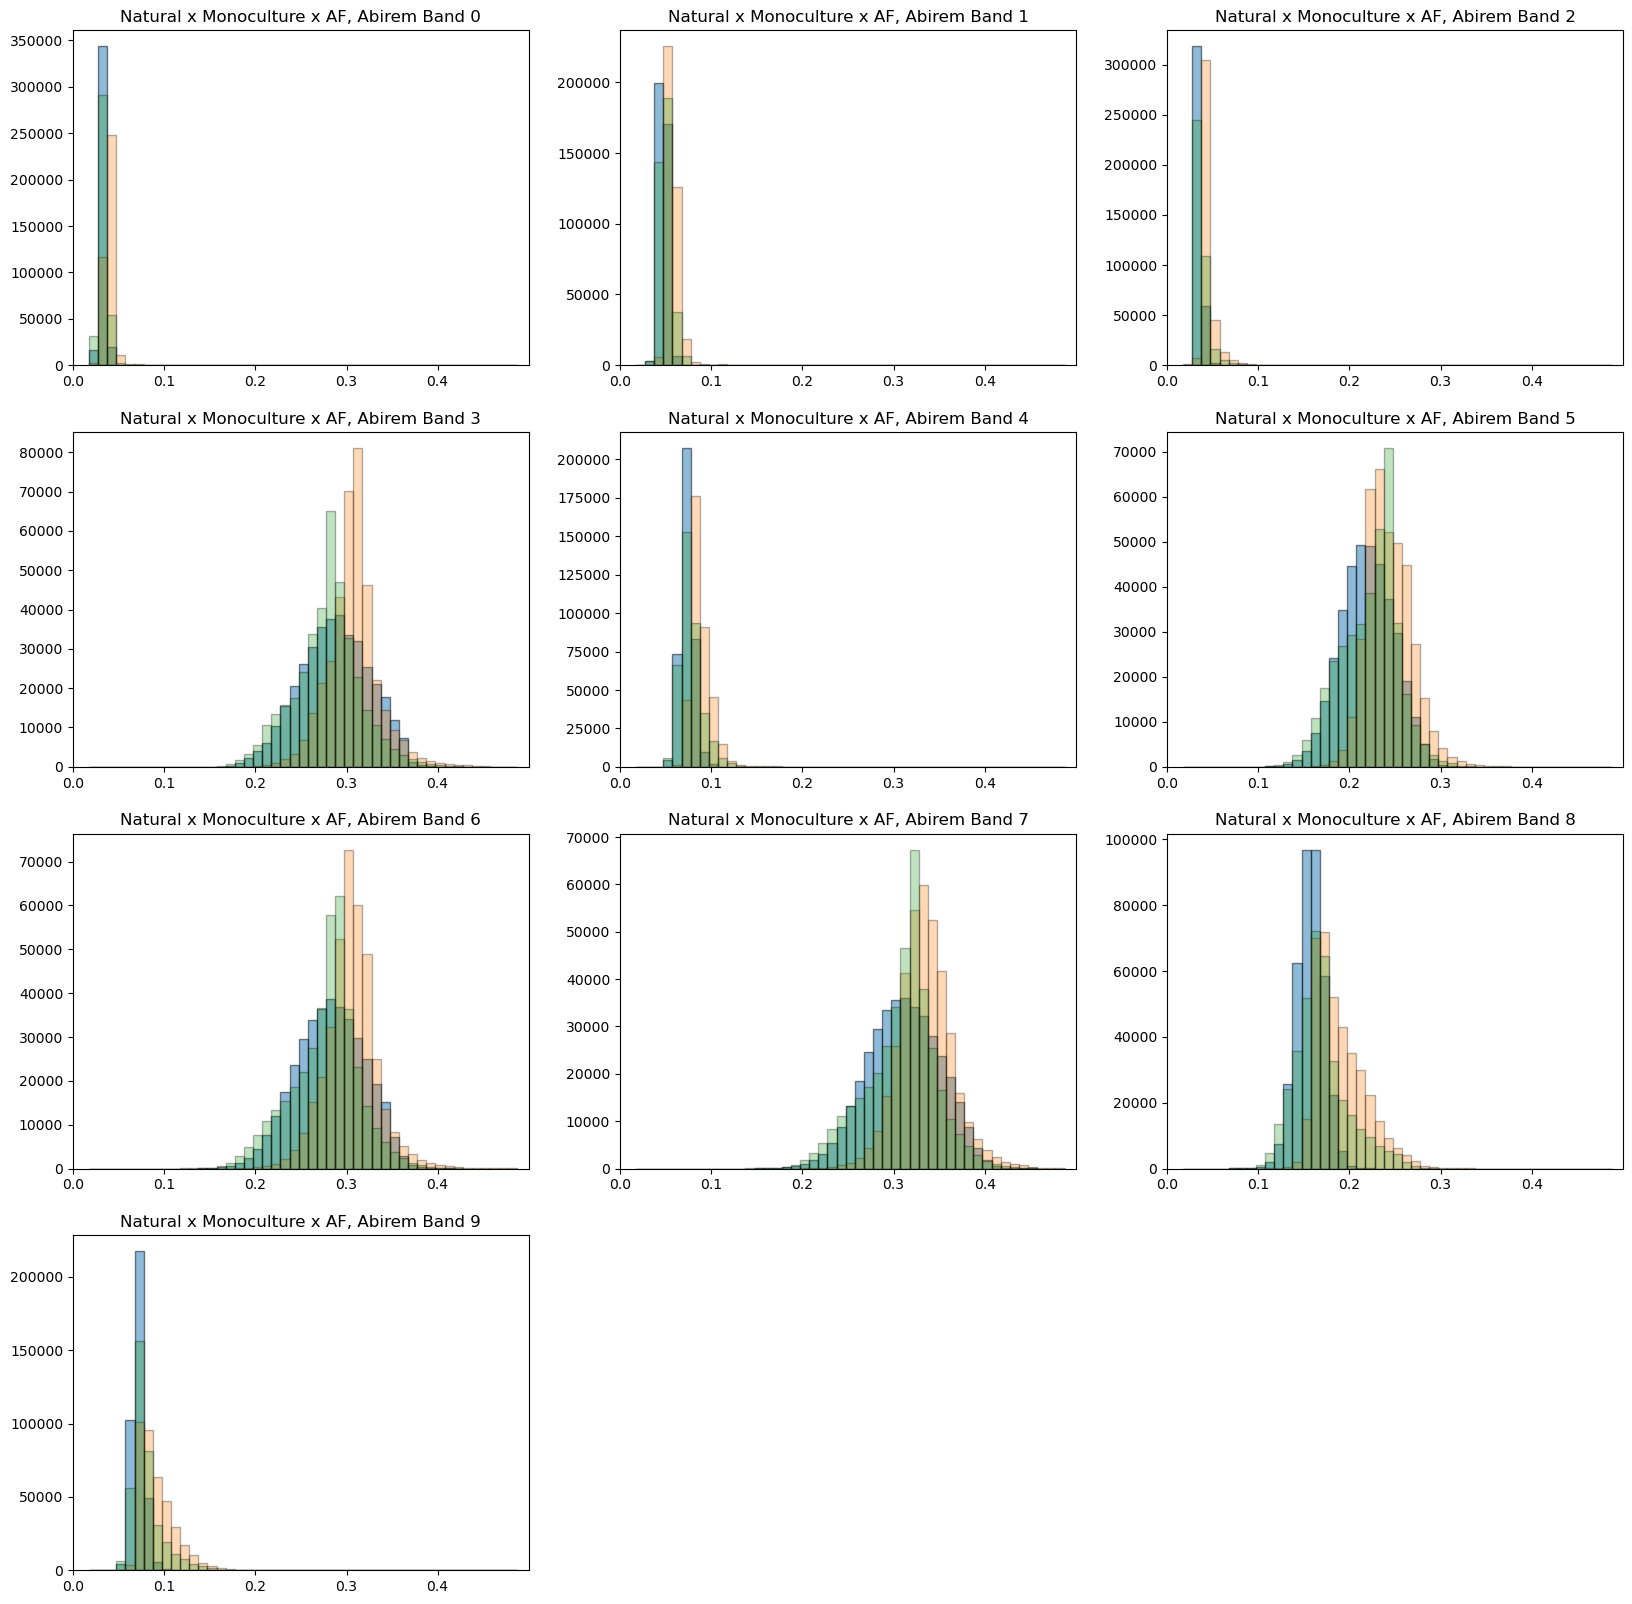

In [70]:
make.hist_compare_s2_byband('ghana', (1668, 1074), (1669, 1073), 'Natural x Monoculture x AF, Abirem', (1668, 1075));

# EDA: Forestry Commission (RMSC) training data 

Training data is organized by Ghana's basin, including 5 basins:
1. Black Volta
2. Pra
3. Sene
4. Tano
5. White Volta


## Top Questions
- How many training data points in total for the region?
- What are the different crop categories? How many points per category?
- When was the data gathered?

In [162]:
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append('../src/')
import ptype_prepare_data as pp
import ptype_visualize as viz

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
folder = '../data/rmsc_train/'

In [176]:
sene = pd.read_csv(folder + 'sene/sene_comb_raw.csv')
pra = pd.read_csv(folder + 'pra/pra_comb_raw.csv')
tano = pd.read_csv(folder + 'tano/tano_comb_raw.csv')
white = pd.read_csv(folder + 'white_volta/white_volta_comb_raw.csv')
black = pd.read_csv(folder + 'black_volta/black_volta_comb_raw.csv')

In [177]:
frames = [sene, pra, tano, white, black]
df = pd.concat(frames)
df.head()

,time,lat,lon,land use,dominant,district,remarks
0,2022-07-24T07:47:59Z,6.648703,-0.743282,NaN,Open Forest,kuahu east,NaN
1,2022-07-24T07:47:59Z,6.696985,-0.745465,NaN,Teak Plantation,kuahu east,NaN
2,2022-07-24T07:47:59Z,6.706291,-0.725214,NaN,Annuals,kuahu east,NaN
3,2022-07-24T07:47:59Z,6.722182,-0.731192,NaN,Grassland,kuahu east,NaN
4,2022-07-24T07:47:59Z,6.685867,-0.768746,NaN,Open Forest,kuahu east,NaN


In [178]:
# turn time category to datetime
df['time'] = pd.to_datetime(df['time']).dt.normalize()

# make all categories lower
df['land use'] = df['land use'].str.lower()
df['dominant'] = df['dominant'].str.lower()

# fix specific wording
df['dominant'] = df['dominant'].replace({'teak plantation':'teak', 
                                         'fallow land': 'fallow',
                                         'maiz': 'maize',
                                          'maze': 'maize',
                                         'shrubs':'shrub',
                                         'shaded': 'shaded cocoa',
                                         'urban': 'settlement',
                                         'grass': 'grassland',
                                         'bare surface': 'bare',
                                         'annual': 'annuals',
                                         'soya beans': 'soyabean',
                                         'soyabbean': 'soyabean',
                                         'palm and rice':'rice and palm',
                                         'shea tree': 'shea',
                                         'gcorn': 'guinea corn', 
                                         'cidrella':'cidrela',
                                         'citrus orange':'citrus'})

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1937 entries, 0 to 242
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype              
---  ------    --------------  -----              
 0   time      374 non-null    datetime64[ns, UTC]
 1   lat       1937 non-null   float64            
 2   lon       1937 non-null   float64            
 3   land use  1530 non-null   object             
 4   dominant  1937 non-null   object             
 5   district  1936 non-null   object             
 6   remarks   1254 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(2), object(4)
memory usage: 121.1+ KB


In [183]:
top_25 = df.dominant.value_counts()[:25]

In [185]:
## useful categories
categories_to_use = ['annuals and cocoa',
 'annuals with cocoa',
 'cashew',
 'cassava adj cocoa',
 'cidrela',
 'citrus',
 'citrus and palm',
 'cocoa',
 'cocoa and annual',
 'cocoa and banana',
 'cocoa and ginger',
 'cocoa and rubber',
 'coconut',
 'eucalyptus',
 'forest',
 'forest and cocoa',
 'mahogany',
 'mango',
 'melina',
 'oil palm',
 'oil palm and cocoa',
 'open forest',
 'palm',
 'palm and cocoa',
 'pawpaw',
 'rice and cocoa',
 'rice and cocoa,palm',
 'rice and oil palm',
 'rice and palm',
 'riverine forest',
 'rubber',
 'rubber and cocoa, rice',
 'shaded cocoa',
 'shea',
 'shea and maize',
 'shea dawadawa',
 'teak',
 'teak and cidrela']

priority = df[df.dominant.isin(categories_to_use)]
priority.head()

,time,lat,lon,land use,dominant,district,remarks
0,2022-07-24 00:00:00+00:00,6.648703,-0.743282,NaN,open forest,kuahu east,NaN
1,2022-07-24 00:00:00+00:00,6.696985,-0.745465,NaN,teak,kuahu east,NaN
4,2022-07-24 00:00:00+00:00,6.685867,-0.768746,NaN,open forest,kuahu east,NaN
18,2022-07-24 00:00:00+00:00,6.556199,-0.726153,NaN,teak,kuahu east,NaN
21,2022-07-23 00:00:00+00:00,6.588588,-0.695538,NaN,open forest,kwahu south,NaN


In [189]:
print(f'Total points: {len(df)}')
print(f'Total crop categories: {len(df.dominant.value_counts())}')
print(f'The highest number of points are collected for \n{top_25[:10]}')
print('---')
print(f'Total priority points: {len(priority)}')
print(f'Total priority categories: {len(categories_to_use)}')
print('---')
print(f'Data was collected between {df.time.min()} and {df.time.max()}')


Total points: 1937
Total crop categories: 124
The highest number of points are collected for 
cocoa           227
maize           201
shea            196
rice            166
grassland       128
millet           81
palm             55
shaded cocoa     53
soyabean         52
teak             51
Name: dominant, dtype: int64
---
Total priority points: 845
Total priority categories: 38
---
Data was collected between 2022-05-12 00:00:00+00:00 and 2022-07-24 00:00:00+00:00


In [154]:
df.to_csv(folder + 'rmsc_clean.csv')

In [190]:
priority.to_csv(folder + 'rmsc_priority.csv', index=False)

## Other questions / explorations

In [112]:
# whats the distribution of land use categories?
# probably better to use the dominant category rather than land use
df['land use'].value_counts()

cropland                  889
woodland                  237
grassland                 125
wetland                    50
otc                        46
forest                     43
shaded cocoa               38
plantation                 26
woodland with grass        18
natural tree species       13
settlement/baresurface      7
bare surface                6
settlement                  6
woodland                    6
mono cocoa                  3
forest reserve              3
cropland                    2
riverine forest             2
savannah woodland           2
wetland (settlement)        1
mountains                   1
                            1
grassland                   1
maize                       1
plantain                    1
shrub                       1
annuals                     1
Name: land use, dtype: int64

In [114]:
# plantation category looks like forest plantations
df[df['land use'] == 'plantation']['dominant'].value_counts()

teak          21
melina         1
borassus       1
eucalyptus     1
cassier        1
mahogany       1
Name: dominant, dtype: int64

In [116]:
# otc land use looks like other tree crops
df[df['land use'] == 'otc']['dominant'].value_counts()

rubber      16
coconut     11
palm         9
oil palm     4
cashew       4
citrus       2
Name: dominant, dtype: int64

In [117]:
# cocoa is represented in a few places
df[df['land use'] == 'mono cocoa']['dominant'].value_counts()

cocoa    3
Name: dominant, dtype: int64

In [118]:
df[df['land use'] == 'shaded cocoa']['dominant'].value_counts()

cocoa    38
Name: dominant, dtype: int64

In [121]:
df[df['land use'] == 'cropland']['dominant'].value_counts()[:10]

maize          172
rice           150
cocoa           91
millet          80
soyabean        46
yam             44
cashew          38
guinea corn     27
fallow          21
mango           19
Name: dominant, dtype: int64

In [167]:
df[df.dominant == 'mango']

,time,lat,lon,land use,dominant,district,remarks
96,NaT,6.871911,-0.295790,cropland,mango,afram plains north south,NaN
100,NaT,6.943461,-0.232487,cropland,mango,afram plains north south,NaN
189,NaT,7.014287,-0.144192,cropland,mango,afram plains north south,NaN
196,NaT,7.111356,-0.212417,cropland,mango,afram plains north south,NaN
221,NaT,7.678434,-0.668814,cropland,mango,sene west,NaN
223,NaT,7.770024,-0.575882,cropland,mango,sene west,NaN
21,NaT,7.456335,-1.962908,cropland,mango,Techiman Municipal,Adjoined to Cropland
46,NaT,7.282855,-2.146400,cropland,mango,Tano North,Adjoined to Fallow Land
161,NaT,7.223139,-1.919775,cropland,mango,Ahafo-Ano,Adjoined to Sacred grove
164,NaT,7.228311,-1.892540,cropland,mango,Ahafo-Ano,Adjoined to Cropland


In [166]:
# v20 has 809 plots, doesnt that mean 158,564 samples?
809*(14*14)

158564